In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf


In [11]:
df = pd.read_csv("Date_Fruit_Datasets.csv")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [12]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### Meanings of each column:
### Morphological Features:
'AREA': total space taken up by a flat 2D shape of an object.<br>
<br>
'PERIMETER': Total length of boundary of the shape<br><br>
'MAJOR_AXIS': Longest diameter of the shape<br><br>
'MINOR_AXIS': Shortest diameter of the shape<br><br>
'ECCENTRICITY': It is the mathematical constant that is given for a conic section. It is the ratio of the distances from any point of the conic section to its focus to the same point to its corresponding directrix. The eccentricity of a conic section tells the measure of how much the curve deviates from being circular.<br><br>
'EQDIASQ': Equidistant, a point which is at the same or equal distance from two given points<br><br>
'SOLIDITY': The degree of hardness of the object. The larger the harder the pobject it is<br><br>
'CONVEX_AREA': The convex area of an object is the area of the convex hull that encloses the object.<br><br>
'EXTENT':  the spatial reach or coverage of object<br><br>
'ASPECT_RATIO': the ratio of the width to the height of object <br><br>
'ROUNDNESS': It is the measure of how closely the shape of an object approaches that of a mathematically perfect circle. The higher the rounder the shape is<br><br>
'COMPACTNESS': the quality of being closely packed together<br><br>
#### Shape Features:
'SHAPEFACTOR_1': might be factor of certain shape <br><br>
'SHAPEFACTOR_2': might be factor of certain shape<br><br>
'SHAPEFACTOR_3': might be factor of certain shape<br><br>
'SHAPEFACTOR_4': might be factor of circle or oval shape<br><br>
#### Color Features:
##### Note: RR (Red-Red), RG (Red-Green), RB (Red-Blue)
##### Note: Kurtosis is a descriptive statistic used to help measure how data disperse between a distribution's center and tails, with larger values indicating a data distribution may have “heavy” tails that are thickly concentrated with observations or that are long with extreme observations.
##### Note: Entropy: the degree of disorder or uncertainty in a system
'MeanRR': The mean value of degree of red color<br><br>
'MeanRG': The mean value of degree of red-green color<br><br>
'MeanRB': The mean value of degree of red-blue color<br><br>
'StdDevRR': The standard deviation value of degree of red color<br><br>
'StdDevRG': The standard deviation value of degree of red-green color<br><br>
'StdDevRB': The standard deviation value of degree of red-blue color<br><br>
'SkewRR': The skewness value of degree of red color<br><br>
'SkewRG': The skewness value of degree of red-green color<br><br>
'SkewRB': The skewness value of degree of red-blue color<br><br>
'KurtosisRR': The kurtosis value of degree of red color<br><br>
'KurtosisRG': The kurtosis value of degree of red-green color<br><br>
'KurtosisRB': The kurtosis value of degree of red-blue color<br><br>
'EntropyRR': The entropy value of degree of red color<br><br>
'EntropyRG': The entropy value of degree of red-green color<br><br>
'EntropyRB': The entropy value of degree of red-blue color<br><br>
'ALLdaub4RR': The degree of daub of red color<br><br>
'ALLdaub4RG': The degree of daub of red color<br><br>
'ALLdaub4RB': The degree of daub of red color<br><br>

In [13]:
# Drop the null item 
df = df.dropna()
# Recheck if the null data has already been dropped
print(df.isnull().sum())

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [15]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Among 34 columns, onlt the last column is not numeric column. It might be the categorical class(label).
There is no null and duplicated data, so no further action of processing is required.

In [16]:
# Find out how many class in this dataset
df_class_set = set()
for i in df['Class']:
    df_class_set.add(i)

df_class_set # There are 7 classes in this dataset


{'BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'}

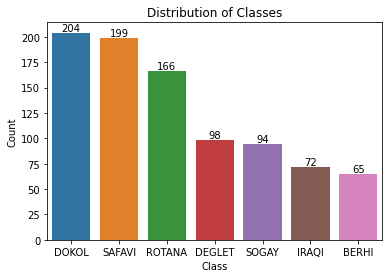

In [17]:
ax = sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

Observation of barplot:<br>
The distribution of data looks not even. For example, data of DOKOL is 3 times more than that of BERHI. DOKOL and SAFAVI has the most data in this dataset.

In [18]:
df_class = df['Class']
df_feat = df.drop(columns='Class')

In [19]:
label_encoder = LabelEncoder()
label_encoder.fit(df_class)
class_label = label_encoder.transform(df_class)

class_label_2d = np.array(class_label).reshape(-1,1)


0:'BERHI' </br>
1:'DEGLET' </br>
2:'DOKOL' </br>
3:'IRAQI' </br>
4:'ROTANA' </br>
5:'SAFAVI' </br>
6:'SOGAY' </br>

In [20]:
# Standardize data
scaler = MinMaxScaler()
scaler.fit(df_feat)
t_df = scaler.transform(df_feat)

In [21]:
# Split data into training data & testing data
X_train, X_test, y_train, y_test = train_test_split(t_df, class_label_2d, test_size=0.2, random_state=1)
# Split training data into training data & validating data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2

In [22]:
# Build model
# Since it's about multi-class categorizing, we choose to use softmax activation in the end
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 50, activation='relu'))
model.add(tf.keras.layers.Dense(units = 20, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))



In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=1000)

Train on 538 samples
Epoch 1/1000
538/538 [==============================] - 0s 857us/sample - loss: 2.2154 - accuracy: 0.2212
Epoch 2/1000
538/538 [==============================] - 0s 61us/sample - loss: 2.0318 - accuracy: 0.4201
Epoch 3/1000
538/538 [==============================] - 0s 59us/sample - loss: 1.8463 - accuracy: 0.4461
Epoch 4/1000
538/538 [==============================] - 0s 60us/sample - loss: 1.6625 - accuracy: 0.4833
Epoch 5/1000
538/538 [==============================] - 0s 58us/sample - loss: 1.4820 - accuracy: 0.5613
Epoch 6/1000
538/538 [==============================] - 0s 61us/sample - loss: 1.3101 - accuracy: 0.6264
Epoch 7/1000
538/538 [==============================] - 0s 62us/sample - loss: 1.1573 - accuracy: 0.6357
Epoch 8/1000
538/538 [==============================] - 0s 54us/sample - loss: 1.0315 - accuracy: 0.6450
Epoch 9/1000
538/538 [==============================] - 0s 59us/sample - loss: 0.9350 - accuracy: 0.6617
Epoch 10/1000
538/538 [==========

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1750      
_________________________________________________________________
dense_1 (Dense)              multiple                  1020      
_________________________________________________________________
dense_2 (Dense)              multiple                  210       
Total params: 2,980
Trainable params: 2,980
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.evaluate(X_val, y_val)

180/180 [==============================] - 0s 623us/sample - loss: 0.3820 - accuracy: 0.9222


[0.38199426660107244, 0.9222222]

In [27]:
y_pred = model.predict(X_val)

In [28]:
y_val_reshape = y_val.reshape(-1,1)
# y_val_reshape.shape

In [29]:
# Use np.argmax to find out the maximum value in each row(the class with the highest probability), and print out its index in each row. 
# Can avoid the error below:
# ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets
y_pred_classes = np.argmax(y_pred, axis=1)

In [31]:
cm = confusion_matrix(y_val_reshape, y_pred_classes)
print(cm)

[[15  0  0  1  2  0  1]
 [ 0 14  4  0  0  0  5]
 [ 0  1 42  0  0  0  0]
 [ 0  0  0 21  0  0  0]
 [ 0  0  0  0 26  0  0]
 [ 0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0 13]]


In [166]:
acc = accuracy_score(y_val_reshape, y_pred_classes)
print(acc)

0.9


In [152]:
# Return to the above steps to try at least five different choices of hyperparameters (including dimensions, activation functions, number of layers, optimizer, loss function, etc.). 
# Neatly present a description each model tried along with the training and validation accuracies, and the confusion matrix.

# Model 1

In [156]:
# Model 1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=1000, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(units=500, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(units=400, activation='relu'))
model1.add(tf.keras.layers.Dense(units=200, activation='relu'))
model1.add(tf.keras.layers.Dense(units=100, activation='relu'))
model1.add(tf.keras.layers.Dense(units=50, activation='relu'))
model1.add(tf.keras.layers.Dense(units=20, activation='relu'))
model1.add(tf.keras.layers.Dense(units=10, activation='relu'))
model1.add(tf.keras.layers.Dense(units=7, activation='softmax'))


In [185]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [186]:
model1.fit(X_train, y_train, epochs=1000)

Train on 538 samples
Epoch 1/1000
538/538 [==============================] - 0s 641us/sample - loss: 0.1354 - accuracy: 0.9498
Epoch 2/1000
538/538 [==============================] - 0s 155us/sample - loss: 0.1170 - accuracy: 0.9554
Epoch 3/1000
538/538 [==============================] - 0s 151us/sample - loss: 0.0643 - accuracy: 0.9703
Epoch 4/1000
538/538 [==============================] - 0s 159us/sample - loss: 0.0505 - accuracy: 0.9758
Epoch 5/1000
538/538 [==============================] - 0s 156us/sample - loss: 0.0549 - accuracy: 0.9814
Epoch 6/1000
538/538 [==============================] - 0s 151us/sample - loss: 0.0668 - accuracy: 0.9740
Epoch 7/1000
538/538 [==============================] - 0s 153us/sample - loss: 0.0529 - accuracy: 0.9777
Epoch 8/1000
538/538 [==============================] - 0s 152us/sample - loss: 0.0655 - accuracy: 0.9721
Epoch 9/1000
538/538 [==============================] - 0s 180us/sample - loss: 0.0883 - accuracy: 0.9610
Epoch 10/1000
538/538 [==

In [187]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             multiple                  35000     
_________________________________________________________________
dense_60 (Dense)             multiple                  500500    
_________________________________________________________________
dense_61 (Dense)             multiple                  200400    
_________________________________________________________________
dense_62 (Dense)             multiple                  80200     
_________________________________________________________________
dense_63 (Dense)             multiple                  20100     
_________________________________________________________________
dense_64 (Dense)             multiple                  5050      
_________________________________________________________________
dense_65 (Dense)             multiple                

In [189]:
model1.evaluate(X_val, y_val)

 32/180 [====>.........................] - ETA: 0s - loss: 3.6783 - accuracy: 0.8750

180/180 [==============================] - 0s 63us/sample - loss: 2.8685 - accuracy: 0.8500


[2.868529216448466, 0.85]

In [190]:
y_pred_model1 = model1.predict(X_val)
y_pred_classes_1 = np.argmax(y_pred_model1, axis=1)

In [191]:
cm_1 = confusion_matrix(y_val_reshape, y_pred_classes_1)
print(cm_1)

[[13  0  0  1  0  0  0]
 [ 0 12  4  0  0  0  6]
 [ 0  5 29  0  0  0  0]
 [ 1  0  0 14  0  1  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  6  1  0  2  0 14]]


In [229]:
acc_1 = accuracy_score(y_val_reshape, y_pred_classes_1)
print(acc_1)

0.8722222222222222


# Model 2

In [193]:
# Model 2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=400, activation='relu'))
model2.add(tf.keras.layers.Dense(units=300, activation='relu'))
model2.add(tf.keras.layers.Dense(units=200, activation='relu'))
model2.add(tf.keras.layers.Dense(units=100, activation='relu'))
model2.add(tf.keras.layers.Dense(units=50, activation='relu'))
model2.add(tf.keras.layers.Dense(units=20, activation='softmax'))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model2.add(tf.keras.layers.Dense(units=7, activation='softmax'))


In [198]:
model2.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [199]:
model2.fit(X_train, y_train, epochs=500)

Train on 538 samples
Epoch 1/500
538/538 [==============================] - 0s 523us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 2/500
538/538 [==============================] - 0s 50us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 3/500
538/538 [==============================] - 0s 58us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 4/500
538/538 [==============================] - 0s 50us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 5/500
538/538 [==============================] - 0s 53us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 6/500
538/538 [==============================] - 0s 55us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 7/500
538/538 [==============================] - 0s 86us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 8/500
538/538 [==============================] - 0s 67us/sample - loss: 44.6619 - accuracy: 0.0000e+00
Epoch 9/500
538/538 [==============================] - 0s 51us/sample - loss: 44.6619 - accuracy: 0.0000e+

In [200]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             multiple                  14000     
_________________________________________________________________
dense_94 (Dense)             multiple                  120300    
_________________________________________________________________
dense_95 (Dense)             multiple                  60200     
_________________________________________________________________
dense_96 (Dense)             multiple                  20100     
_________________________________________________________________
dense_97 (Dense)             multiple                  5050      
_________________________________________________________________
dense_98 (Dense)             multiple                  1020      
_________________________________________________________________
dense_99 (Dense)             multiple                

In [201]:
model2.evaluate(X_val, y_val)

180/180 [==============================] - 0s 401us/sample - loss: 45.4046 - accuracy: 0.0000e+00


[45.404571024576825, 0.0]

In [206]:
y_pred_model2 = model2.predict(X_val)
y_pred_classes_2 = np.argmax(y_pred_model2, axis=1)

In [207]:
cm_2 = confusion_matrix(y_val_reshape, y_pred_classes_2)
print(cm_2)

[[ 0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0 22]
 [ 0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0 23]]


In [208]:
acc_2 = accuracy_score(y_val_reshape, y_pred_classes_2)
print(acc_2)

0.12777777777777777


# Model 3

In [184]:
# Model 3
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(units=300, activation='relu'))
model3.add(tf.keras.layers.Dense(units=200, activation='relu'))
model3.add(tf.keras.layers.Dense(units=100, activation='relu'))
model3.add(tf.keras.layers.Dense(units=50, activation='relu'))
model3.add(tf.keras.layers.Dense(units=40, activation='relu'))
model3.add(tf.keras.layers.Dense(units=30, activation='relu'))
model3.add(tf.keras.layers.Dense(units=20, activation='relu'))
model3.add(tf.keras.layers.Dense(units=10, activation='relu'))
model3.add(tf.keras.layers.Dense(units=7, activation='softmax'))


In [211]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [213]:
model3.fit(X_train, y_train, epochs=500)

Train on 538 samples
Epoch 1/500
538/538 [==============================] - 0s 523us/sample - loss: 1.8599 - accuracy: 0.2955
Epoch 2/500
538/538 [==============================] - 0s 40us/sample - loss: 1.5888 - accuracy: 0.3197
Epoch 3/500
538/538 [==============================] - 0s 42us/sample - loss: 1.3651 - accuracy: 0.3494
Epoch 4/500
538/538 [==============================] - 0s 43us/sample - loss: 1.2308 - accuracy: 0.4926
Epoch 5/500
538/538 [==============================] - 0s 39us/sample - loss: 1.0784 - accuracy: 0.5576
Epoch 6/500
538/538 [==============================] - 0s 44us/sample - loss: 0.9116 - accuracy: 0.7230
Epoch 7/500
538/538 [==============================] - 0s 40us/sample - loss: 0.7815 - accuracy: 0.7472
Epoch 8/500
538/538 [==============================] - 0s 39us/sample - loss: 0.6806 - accuracy: 0.7435
Epoch 9/500
538/538 [==============================] - 0s 46us/sample - loss: 0.6701 - accuracy: 0.7472
Epoch 10/500
538/538 [====================

In [214]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             multiple                  10500     
_________________________________________________________________
dense_85 (Dense)             multiple                  60200     
_________________________________________________________________
dense_86 (Dense)             multiple                  20100     
_________________________________________________________________
dense_87 (Dense)             multiple                  5050      
_________________________________________________________________
dense_88 (Dense)             multiple                  2040      
_________________________________________________________________
dense_89 (Dense)             multiple                  1230      
_________________________________________________________________
dense_90 (Dense)             multiple                

In [215]:
y_pred_model3 = model3.predict(X_val)
y_pred_classes_3 = np.argmax(y_pred_model3, axis=1)

In [216]:
cm_3 = confusion_matrix(y_val_reshape, y_pred_classes_3)
print(cm_3)

[[13  0  0  1  0  0  0]
 [ 0 15  5  0  0  0  2]
 [ 0  3 31  0  0  0  0]
 [ 1  0  0 15  0  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  3  0  0  0  0 20]]


In [217]:
acc_3 = accuracy_score(y_val_reshape, y_pred_classes_3)
print(acc_3)

0.9166666666666666


# Model 4

In [218]:
# Model 4
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(units=20, activation='relu'))
model4.add(tf.keras.layers.Dense(units=10, activation='relu'))
model4.add(tf.keras.layers.Dense(units=7, activation='softmax'))


In [222]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [223]:
model4.fit(X_train, y_train, epochs=500)

Train on 538 samples
Epoch 1/500
538/538 [==============================] - 0s 315us/sample - loss: 2.0720 - accuracy: 0.2007
Epoch 2/500
538/538 [==============================] - 0s 25us/sample - loss: 1.9413 - accuracy: 0.2138
Epoch 3/500
538/538 [==============================] - 0s 26us/sample - loss: 1.8834 - accuracy: 0.2156
Epoch 4/500
538/538 [==============================] - 0s 24us/sample - loss: 1.8372 - accuracy: 0.2695
Epoch 5/500
538/538 [==============================] - 0s 20us/sample - loss: 1.7888 - accuracy: 0.3532
Epoch 6/500
538/538 [==============================] - 0s 22us/sample - loss: 1.7379 - accuracy: 0.4145
Epoch 7/500
538/538 [==============================] - 0s 23us/sample - loss: 1.6827 - accuracy: 0.4442
Epoch 8/500
538/538 [==============================] - 0s 24us/sample - loss: 1.6270 - accuracy: 0.4480
Epoch 9/500
538/538 [==============================] - 0s 23us/sample - loss: 1.5707 - accuracy: 0.4554
Epoch 10/500
538/538 [====================

In [224]:
model4.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            multiple                  700       
_________________________________________________________________
dense_102 (Dense)            multiple                  210       
_________________________________________________________________
dense_103 (Dense)            multiple                  77        
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [225]:
model4.evaluate(X_val, y_val)

180/180 [==============================] - 0s 286us/sample - loss: 0.2747 - accuracy: 0.9000


[0.27474813527531095, 0.9]

In [227]:
y_pred_model4 = model1.predict(X_val)
y_pred_classes_4 = np.argmax(y_pred_model4, axis=1)

In [228]:
cm_4 = confusion_matrix(y_val_reshape, y_pred_classes_4)
print(cm_4)

[[13  0  0  1  0  0  0]
 [ 0 14  4  0  0  0  4]
 [ 0  5 29  0  0  0  0]
 [ 1  0  0 15  0  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  6  1  0  1  0 15]]


In [230]:
acc_4 = accuracy_score(y_val_reshape, y_pred_classes_4)
print(acc_4)

0.8722222222222222


# Model 5

In [239]:
# Model 5
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model5.add(tf.keras.layers.Dense(units=900, activation='relu'))
model5.add(tf.keras.layers.Dense(units=800, activation='relu'))
model5.add(tf.keras.layers.Dense(units=700, activation='relu'))
model5.add(tf.keras.layers.Dense(units=600, activation='relu'))
model5.add(tf.keras.layers.Dense(units=500, activation='relu'))
model5.add(tf.keras.layers.Dense(units=400, activation='relu'))
model5.add(tf.keras.layers.Dense(units=300, activation='relu'))
model5.add(tf.keras.layers.Dense(units=200, activation='relu'))
model5.add(tf.keras.layers.Dense(units=100, activation='relu'))
model5.add(tf.keras.layers.Dense(units=50, activation='relu'))
model5.add(tf.keras.layers.Dense(units=40, activation='relu'))
model5.add(tf.keras.layers.Dense(units=30, activation='relu'))
model5.add(tf.keras.layers.Dense(units=20, activation='relu'))
model5.add(tf.keras.layers.Dense(units=10, activation='relu'))
model5.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [240]:
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [241]:
model5.fit(X_train, y_train, epochs=500)

Train on 538 samples
Epoch 1/500
538/538 [==============================] - 1s 1ms/sample - loss: 1.8849 - accuracy: 0.2472
Epoch 2/500
538/538 [==============================] - 0s 412us/sample - loss: 1.4623 - accuracy: 0.4349
Epoch 3/500
538/538 [==============================] - 0s 419us/sample - loss: 1.2497 - accuracy: 0.4461
Epoch 4/500
538/538 [==============================] - 0s 413us/sample - loss: 1.1181 - accuracy: 0.4461
Epoch 5/500
538/538 [==============================] - 0s 421us/sample - loss: 1.0060 - accuracy: 0.4628
Epoch 6/500
538/538 [==============================] - 0s 452us/sample - loss: 0.9182 - accuracy: 0.4758
Epoch 7/500
538/538 [==============================] - 0s 484us/sample - loss: 0.9222 - accuracy: 0.5446
Epoch 8/500
538/538 [==============================] - 0s 423us/sample - loss: 0.9250 - accuracy: 0.5502
Epoch 9/500
538/538 [==============================] - 0s 424us/sample - loss: 0.9725 - accuracy: 0.6394
Epoch 10/500
538/538 [==============

In [242]:
model5.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            multiple                  35000     
_________________________________________________________________
dense_140 (Dense)            multiple                  900900    
_________________________________________________________________
dense_141 (Dense)            multiple                  720800    
_________________________________________________________________
dense_142 (Dense)            multiple                  560700    
_________________________________________________________________
dense_143 (Dense)            multiple                  420600    
_________________________________________________________________
dense_144 (Dense)            multiple                  300500    
_________________________________________________________________
dense_145 (Dense)            multiple                

In [243]:
y_pred_model5 = model5.predict(X_val)
y_pred_classes_5 = np.argmax(y_pred_model5, axis=1)

In [244]:
cm_5 = confusion_matrix(y_val_reshape, y_pred_classes_5)
print(cm_5)

[[14  0  0  0  0  0  0]
 [ 0 15  4  0  0  0  3]
 [ 0  4 30  0  0  0  0]
 [ 5  0  0 11  0  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0  0 40  0]
 [ 0  8  0  0  0  0 15]]


In [245]:
acc_5 = accuracy_score(y_val_reshape, y_pred_classes_5)
print(acc_5)

0.8666666666666667


# Accuracy comparison
Model 0: 0.9 </br>
Model 1: 0.872 </br>
Model 2: 0.128 </br>
Model 3: 0.917 </br>
Model 4: 0.872 </br>
Model 5: 0.867 </br>

### Both model 0 and model 3 performs well. The difference between the two is that there are 8 relu layers in model3, with unit of Dense from 300 to 7 . While in model 0, there are only 2 layers of relu, with unit of Dense from 50 to 10. 
### We also find that more softmax layers doesn't lead to better result
### We also try augment the unit of Dense, changing loss function to categorical_crossentropy,or adjusting smaller learning rate, but these does not lead to better performance.
### Therefore, we still choose 'adam' as optimizer, without specifying the learning rate. Increasing the number of hidden layer, but do not let the unit of Dense go too high.
### As the accuracy_score of model 3 is the highest among all the model, we think model 3 is the best model.

## Best Model : Model 3


In [247]:
y_test_reshape = y_test.reshape(-1,1)

In [246]:
y_pred_test = model3.predict(X_test)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)

In [248]:
cm_test = confusion_matrix(y_test_reshape, y_pred_classes_test)
print(cm_test)

[[13  0  0  1  0  0  2]
 [ 0 15  3  0  0  0  0]
 [ 0  3 38  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 1  0  0  0 34  0  3]
 [ 0  0  0  0  0 43  0]
 [ 0  1  0  0  1  0 12]]


In [249]:
acc_test = accuracy_score(y_test_reshape, y_pred_classes_test)
print(acc_test)

0.9166666666666666


### The majority of values are on the diagonal, indicating that the model is correctly predicting the majority of instances. The accuracy score indicates that the model correctly classified 91.67% of the instances. This is a relatively high accuracy, suggesting that the model is performing well overall. 

### Based on the confusion matrix and accuracy score, the model appears to be performing well for this use case. However, there are still some areas for improvement, particularly in terms of reducing misclassifications for certain classes.